In [16]:
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline,Pipeline
import matplotlib.pyplot as plt 

from grid_search_utils import plot_grid_search,table_grid_search

from data_prepare_func import convert_to_array

In [17]:
x_kit,y_kit = convert_to_array("data_fr_kittinan/",size=28)
x_diy,y_diy = convert_to_array('data_writing_diy/',size=28)

In [18]:
x = np.append(x_kit,x_diy,axis=0)

y = np.append(y_kit,y_diy,axis=0)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)

In [20]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [21]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression()) # object='multi:softmax',num_class=4,seed=42,eval_metric='merror'
])

In [22]:
parameters = [{'classifier__C' : [0.001, 0.01, 0.1,1]
               ,'classifier__solver':[ 'newton-cg','sag','saga','lbfgs']
               ,'classifier__max_iter':[50,100]
               ,'classifier__multi_class':['auto','ovr','multinomial']},
]

In [9]:
# 50m 20.9s
grid = GridSearchCV(pipe,parameters,cv=5,n_jobs=-1,scoring='accuracy')
grid.fit(x_train, y_train)
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

Best parameter (CV score=0.788):
{'classifier__C': 0.01, 'classifier__max_iter': 100, 'classifier__multi_class': 'multinomial', 'classifier__solver': 'saga'}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=0.01, multi_class='multinomial',
                                    solver='saga'))])


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [23]:
pipe.set_params(classifier__C=0.01, classifier__max_iter = 100, classifier__multi_class = 'multinomial', classifier__solver = 'saga')

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=0.01, multi_class='multinomial',
                                    solver='saga'))])

In [24]:
train_sizes, train_scores, test_scores = learning_curve(pipe, x_train, y_train, cv=5, scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

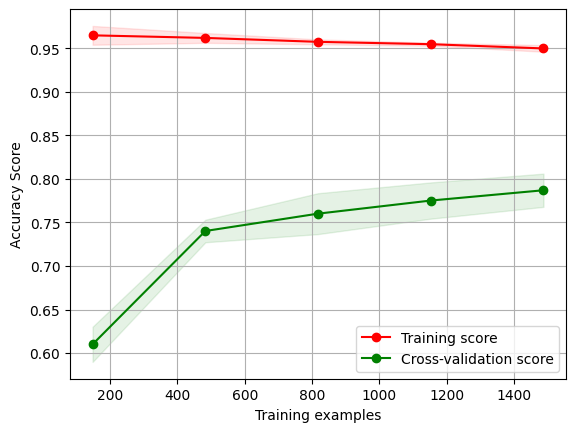

In [25]:
plt.figure()
plt.xlabel("Training examples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label="Cross-validation score")

plt.legend(loc="best")

In [26]:
x = np.append(x_kit,x_diy,axis=0)

y = np.append(y_kit,y_diy,axis=0)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)

In [30]:
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=0.01, multi_class='multinomial',
                                    solver='saga'))])

pipe.fit(x_train, y_train,)

print('Training lr set score: ' + str(pipe.score(x_train,y_train)))
print('Test lr set score: ' + str(pipe.score(x_test,y_test)))

Training lr set score: 0.9478214093598709
Test lr set score: 0.7969924812030075


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [31]:
pipe.fit(x_train, y_train)

train_yhat = pipe.predict(x_train)
train_pipe = pipe.score(x_train,y_train)

test_yhat = pipe.predict(x_test)
test_pipe = pipe.score(x_test,y_test)
print('Train Score\n',classification_report(y_train,train_yhat))
print('Test Score\n',classification_report(y_test, test_yhat))
print(f"AVG Accuracy Train: {train_pipe}\nAVG Accuracy Test: {test_pipe}")


Train Score
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       185
           1       0.99      0.98      0.99       185
           2       0.96      0.99      0.98       187
           3       0.98      0.97      0.98       188
           4       0.99      0.89      0.93       185
           5       0.89      0.91      0.90       185
           6       0.86      0.96      0.91       185
           7       0.95      0.93      0.94       185
           8       0.97      0.90      0.93       184
           9       0.91      0.97      0.94       190

    accuracy                           0.95      1859
   macro avg       0.95      0.95      0.95      1859
weighted avg       0.95      0.95      0.95      1859

Test Score
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        79
           1       0.94      0.93      0.93        80
           2       0.92      0.81      0.86        80

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [32]:
lr_val_score = cross_val_score(pipe,x_train,y_train,scoring='accuracy',cv=10)
print(f"Average lr cv score: {round(np.mean(lr_val_score),4)}\nlr SD: {lr_val_score.std()}")

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

Average lr cv score: 0.7945
lr SD: 0.02200730192366067


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [17]:
plot_grid_search(grid)

In [25]:
table_grid_search(grid)

c:\Users\Asus\Documents\GitHub\dads-6003-thai_num_classification\grid_search_utils.py:176: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis="index")`

